## Predicting and Mitigating Climate Change Impacts Using AI

## Import the required libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Import the required dataset

In [ ]:

dataset = pd.read_csv("/content/climate-change.csv")


In [ ]:
print(dataset.head())

  Country code Country name     Series code  \
0          ABW        Aruba  AG.LND.EL5M.ZS   
1          ADO      Andorra  AG.LND.EL5M.ZS   
2          AFG  Afghanistan  AG.LND.EL5M.ZS   
3          AGO       Angola  AG.LND.EL5M.ZS   
4          ALB      Albania  AG.LND.EL5M.ZS   

                           Series name SCALE Decimals       1990 1991 1992  \
0  Land area below 5m (% of land area)     0        1   29.57481   ..   ..   
1  Land area below 5m (% of land area)     0        1          0   ..   ..   
2  Land area below 5m (% of land area)     0        1          0   ..   ..   
3  Land area below 5m (% of land area)     0        1  0.2082346   ..   ..   
4  Land area below 5m (% of land area)     0        1   4.967875   ..   ..   

  1993  ... 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011  
0   ..  ...   ..   ..   ..   ..   ..   ..   ..   ..   ..   ..  
1   ..  ...   ..   ..   ..   ..   ..   ..   ..   ..   ..   ..  
2   ..  ...   ..   ..   ..   ..   ..   ..   ..   ..   ..

## Data Cleaning

In [ ]:
dataset.replace("..", np.nan, inplace=True)
yearly_columns = [str(year) for year in range(1990, 2012)]
dataset[yearly_columns] = dataset[yearly_columns].apply(pd.to_numeric, errors='coerce')

In [ ]:
print(dataset)

                               Series name          1990          1991  \
0      Land area below 5m (% of land area)  2.957481e+01           NaN   
1      Land area below 5m (% of land area)  0.000000e+00           NaN   
2      Land area below 5m (% of land area)  0.000000e+00           NaN   
3      Land area below 5m (% of land area)  2.082346e-01           NaN   
4      Land area below 5m (% of land area)  4.967875e+00           NaN   
...                                    ...           ...           ...   
13507                     Urban population  2.497176e+06  2.693642e+06   
13508                     Urban population  1.830400e+07  1.886488e+07   
13509                     Urban population  1.012093e+07  1.056945e+07   
13510                     Urban population  3.096861e+06  3.141668e+06   
13511                     Urban population  3.036069e+06  3.175023e+06   

               1992          1993          1994          1995          1996  \
0               NaN           Na

In [ ]:
dataset.drop(columns=['Country code', 'Country name', 'Series code', 'SCALE', 'Decimals'], inplace=True)

In [ ]:
print(dataset)

                               Series name          1990          1991  \
0      Land area below 5m (% of land area)  2.957481e+01           NaN   
1      Land area below 5m (% of land area)  0.000000e+00           NaN   
2      Land area below 5m (% of land area)  0.000000e+00           NaN   
3      Land area below 5m (% of land area)  2.082346e-01           NaN   
4      Land area below 5m (% of land area)  4.967875e+00           NaN   
...                                    ...           ...           ...   
13507                     Urban population  2.497176e+06  2.693642e+06   
13508                     Urban population  1.830400e+07  1.886488e+07   
13509                     Urban population  1.012093e+07  1.056945e+07   
13510                     Urban population  3.096861e+06  3.141668e+06   
13511                     Urban population  3.036069e+06  3.175023e+06   

               1992          1993          1994          1995          1996  \
0               NaN           Na

## Filter Target data

In [ ]:
target_data = dataset[dataset['Series name'].str.contains("CO2 emissions", case=False, na=False)].copy()


In [ ]:
target_data.drop(columns=['Series name'], inplace=True)

In [ ]:
target_data.fillna(method='ffill', axis=1, inplace=True)


<ipython-input-60-c53dddf90913>:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  target_data.fillna(method='ffill', axis=1, inplace=True)


In [ ]:
target_data = target_data.apply(pd.to_numeric, errors='coerce')

In [ ]:
target_data.dropna(inplace=True)

In [ ]:
print(target_data)

              1990          1991          1992          1993          1994  \
1631   1840.834000   1928.842000   1723.490000   1771.161000   1763.827000   
1633   2676.910000   2493.560000   1426.463000   1375.125000   1320.120000   
1634   4429.736000   4367.397000   4418.735000   5801.194000   3890.687000   
1635   7488.014000   3971.361000   2387.217000   2343.213000   1928.842000   
1636  52009.061000  57010.849000  58136.618000  65980.331000  73130.981000   
...            ...           ...           ...           ...           ...   
2324    294.916481    301.859235    311.360175    299.097191    289.361799   
2325   -137.121067    453.232875    595.219998    375.078467    442.502861   
2326   1188.108721   1246.484190   1194.689823   1244.421476   1263.079694   
2327    177.188966    178.491689    192.226032    209.317977    158.324044   
2328    249.227746    246.327514    254.850465    242.904095    257.258129   

              1995          1996          1997          1998   

## Define features and labels

In [ ]:
features = target_data[yearly_columns[:-1]]  # All years except the target year
labels = target_data['2011']  # Use 2011 as the target variable

In [ ]:
print(features)

              1990          1991          1992          1993          1994  \
1631   1840.834000   1928.842000   1723.490000   1771.161000   1763.827000   
1633   2676.910000   2493.560000   1426.463000   1375.125000   1320.120000   
1634   4429.736000   4367.397000   4418.735000   5801.194000   3890.687000   
1635   7488.014000   3971.361000   2387.217000   2343.213000   1928.842000   
1636  52009.061000  57010.849000  58136.618000  65980.331000  73130.981000   
...            ...           ...           ...           ...           ...   
2324    294.916481    301.859235    311.360175    299.097191    289.361799   
2325   -137.121067    453.232875    595.219998    375.078467    442.502861   
2326   1188.108721   1246.484190   1194.689823   1244.421476   1263.079694   
2327    177.188966    178.491689    192.226032    209.317977    158.324044   
2328    249.227746    246.327514    254.850465    242.904095    257.258129   

              1995          1996          1997          1998   

In [ ]:
print(labels)

1631      2288.208000
1633       814.074000
1634     24370.882000
1635      4176.713000
1636    155066.429000
            ...      
2324       213.041296
2325       458.830121
2326       930.310881
2327       151.165020
2328       119.388624
Name: 2011, Length: 531, dtype: float64


## Splitting the data into Training set and Testing set

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

## Model Training

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

## Model Prediction and Evaluation

In [ ]:
y_pred = model.predict(X_test)

## Calculate Mean Squared Error , R2 Square

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")


Mean Squared Error: 4.480921127155897e-16


In [ ]:
r2 = r2_score(y_test, y_pred)
print(f"R2 Score: {r2}")

R2 Score: 1.0


## Visualization using pyplot & seaborn

In [ ]:
import seaborn as sns

In [ ]:
coef_df = pd.DataFrame({
    'Year': yearly_columns[:-1],
    'Coefficient': model.coef_
})

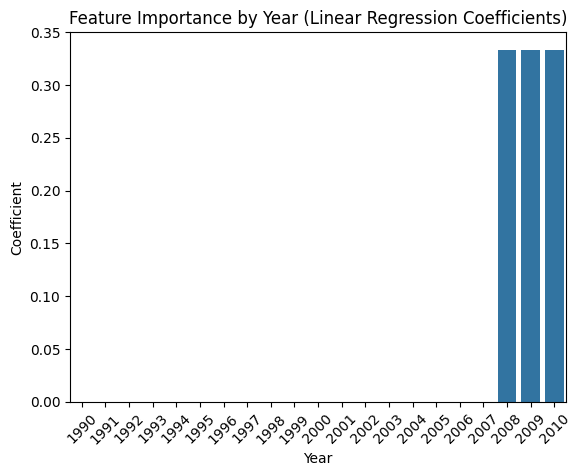

In [ ]:
sns.barplot(x='Year', y='Coefficient', data=coef_df)
plt.xlabel('Year')
plt.ylabel('Coefficient')
plt.title('Feature Importance by Year')
plt.xticks(rotation=45)
plt.show()